In [1]:
%%capture
%run ./read_data.ipynb

### AdaBoost Regression Model

In [2]:
from sklearn.ensemble import AdaBoostRegressor 

In [3]:
abr = AdaBoostRegressor()
abr.fit(X_train,y_train)

AdaBoostRegressor()

In [4]:
train_test_report(abr)

Train score: 		         0.8584
Test score: 		         0.8599


<Figure size 432x288 with 0 Axes>

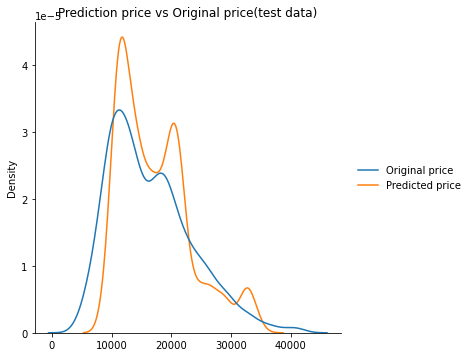

In [5]:
plot_prediction_compare_ori(abr, title="Prediction price vs Original price(test data)")

<Figure size 432x288 with 0 Axes>

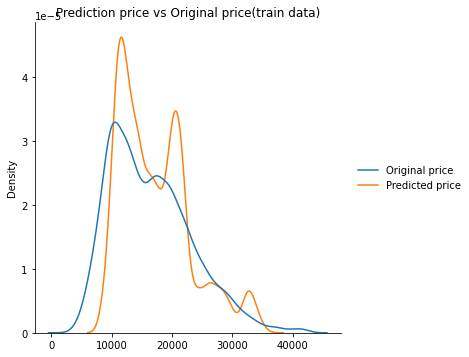

In [6]:
# prediction on train data
plot_prediction_compare_ori(abr, X_train, y_train, title="Prediction price vs Original price(train data)")

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
parameters={
    'base_estimator__max_depth': [10, 20, 50, 60, 100],
    'n_estimators': [50, 100, 200, 300, 500]  
}
abr_tuned = GridSearchCV(AdaBoostRegressor(base_estimator=DecisionTreeRegressor()), parameters)
abr_tuned.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor()),
             param_grid={'base_estimator__max_depth': [10, 20, 50, 60, 100],
                         'n_estimators': [50, 100, 200, 300, 500]})

In [8]:
gs_report(abr_tuned)

Best score: 			         0.9517
Best parameters: 		{'base_estimator__max_depth': 10, 'n_estimators': 50}
Best estimator: 		AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10))


In [9]:
train_test_report(abr_tuned)

Train score: 		         0.9730
Test score: 		         0.9536


In [10]:
from sklearn.model_selection import cross_val_score

ori_cv_scores = cross_val_score(abr, X, y, cv=10)
tuned_cv_scores = cross_val_score(abr_tuned.best_estimator_, X, y, cv=10)

cv_df = pd.DataFrame({'Original CV score': ori_cv_scores, 'Tuned CV score': tuned_cv_scores})



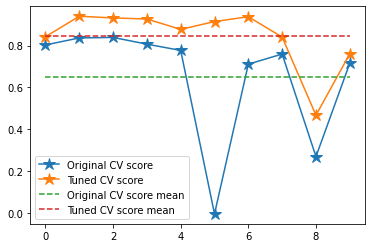

In [11]:
plt.plot(cv_df['Original CV score'],label='Original CV score', marker='*', markersize=12)
plt.plot(cv_df['Tuned CV score'], label='Tuned CV score',marker='*', markersize=12)
plt.plot([cv_df['Original CV score'].mean()] * len(cv_df), label='Original CV score mean', linestyle='--')
plt.plot([cv_df['Tuned CV score'].mean()] * len(cv_df),
         label='Tuned CV score mean', linestyle='--')
plt.legend()
plt.show()

In [12]:
cv_df.mean()

Original CV score    0.651407
Tuned CV score       0.843848
dtype: float64

In [13]:
regression_report_compare_model(abr, abr_tuned)

Before tuning hyperparameter: 

Accuracy score: 			         0.8747
R-squared score: 			         0.8599
Mean Absolute Error(MAE): 		      2097.4699
Mean Squared Error (MSE): 		   6794334.0736
Root Mean Squared Error (RSME): 	      2606.5943
-------------------------------------------------------
After tuning hyper parameter: 

Accuracy score: 			         0.9543
R-squared score: 			         0.9536
Mean Absolute Error(MAE): 		      1072.4108
Mean Squared Error (MSE): 		   2249669.5485
Root Mean Squared Error (RSME): 	      1499.8898


<Figure size 432x288 with 0 Axes>

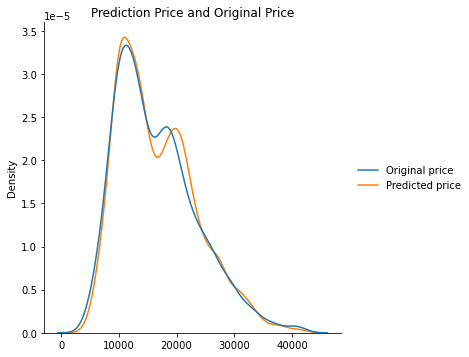

In [14]:
plot_prediction_compare_ori(abr_tuned.best_estimator_)

In [15]:
feature_names = X.columns

#feature importance for abr
feature_importances = abr.feature_importances_
feature_importances= 100.0*(feature_importances / max(feature_importances))
index_sorted= np.flipud(np.argsort(feature_importances))
pos = np.arange(index_sorted.shape[0]) + 0.5
#feature importance for abr_tuned
feature_importances_tuned = abr_tuned.best_estimator_.feature_importances_
feature_importances_tuned = 100.0*(feature_importances_tuned / max(feature_importances_tuned))
index_sorted_tuned = np.flipud(np.argsort(feature_importances_tuned))
pos_tuned = np.arange(index_sorted.shape[0]) + 0.5

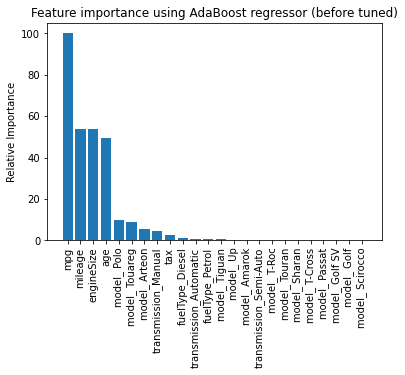

In [16]:
plt.figure()
plt.bar(pos, feature_importances[index_sorted], align='center')
plt.xticks(pos, feature_names[index_sorted], rotation=90)
plt.ylabel('Relative Importance')
plt.title('Feature importance using AdaBoost regressor (before tuned)')
plt.show()

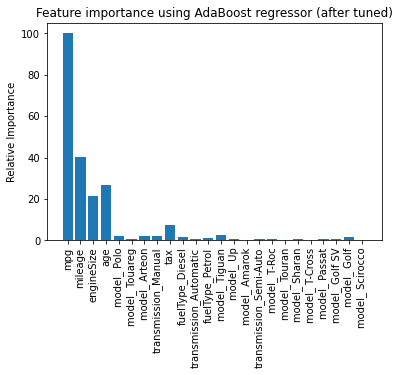

In [17]:
plt.figure()
plt.bar(pos_tuned, feature_importances_tuned[index_sorted], align='center')
plt.xticks(pos, feature_names[index_sorted], rotation=90)
plt.ylabel('Relative Importance')
plt.title('Feature importance using AdaBoost regressor (after tuned)')
plt.show()

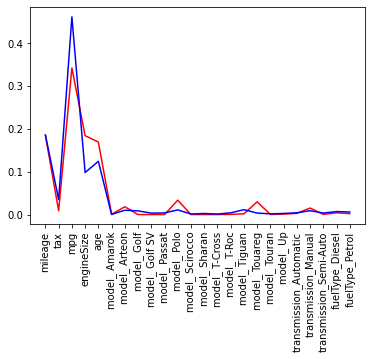

In [18]:
plt.plot(X_train.columns,abr.feature_importances_,color='red')
plt.plot(X_train.columns,abr_tuned.best_estimator_.feature_importances_,color='blue')
plt.xticks(rotation=90)
plt.show()